In [1]:
# LSTM (Many to One Single Numeric Feature)
# =========================================

%tensorflow_version 2.x

import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.0.0'

In [0]:
# univariate lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import TensorBoard
# from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt
from time import time

In [0]:
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60],  [50, 60, 70],  [60, 70, 80],  [70, 80, 90]])
y = array([40, 50, 60, 70, 80, 90, 100])

In [4]:
X[:3] , X.dtype, y[:3], y.dtype

(array([[10, 20, 30],
        [20, 30, 40],
        [30, 40, 50]]), dtype('int64'), array([40, 50, 60]), dtype('int64'))

In [5]:

print("X.shape : {}".format(X.shape))

# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X.shape2 : {}".format(X.shape))


X.shape : (7, 3)
X.shape2 : (7, 3, 1)


In [6]:
X[:3] , X.dtype

(array([[[10],
         [20],
         [30]],
 
        [[20],
         [30],
         [40]],
 
        [[30],
         [40],
         [50]]]), dtype('int64'))

In [0]:
X = tf.cast(X,tf.float32)
y = tf.cast(y,tf.float32)

In [8]:
X[:3] , y[:3]

(<tf.Tensor: id=7, shape=(3, 3, 1), dtype=float32, numpy=
 array([[[10.],
         [20.],
         [30.]],
 
        [[20.],
         [30.],
         [40.]],
 
        [[30.],
         [40.],
         [50.]]], dtype=float32)>,
 <tf.Tensor: id=11, shape=(3,), dtype=float32, numpy=array([40., 50., 60.], dtype=float32)>)

In [0]:
# %load_ext tensorboard
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=1)
# %tensorboard --logdir logs

In [0]:
# es = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose=1, mode='max')

In [11]:
# define model

model = Sequential()
model.add(Bidirectional(LSTM(1000, activation='relu', input_shape=(3, 1), return_sequences=False)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# history = model.fit(X, y, epochs=200, validation_split=0.2, batch_size=8, verbose=0)
# history = model.fit(X, y, epochs=200, validation_split=0.2, verbose=0)
history = model.fit(X, y, epochs=200, validation_split=0.1, batch_size=3, verbose=0)

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  8016000   
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  200100    
_________________________________________________________________
dense_1 (Dense)              multiple                  101       
Total params: 8,216,201
Trainable params: 8,216,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
# model.fit(X, y, epochs=500, validation_split=0.2, verbose=1, callbacks=[tensorboard])
# history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=0, callbacks=[])

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


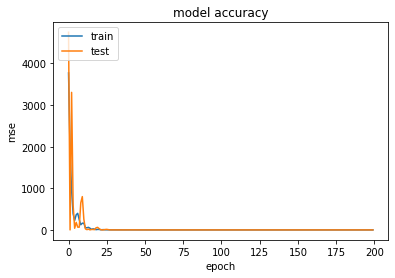

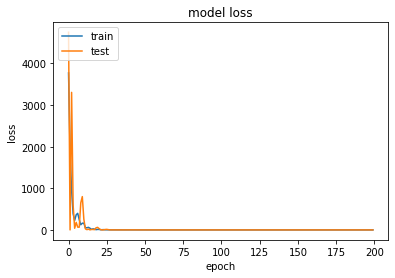

In [13]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# demonstrate prediction
x_input = array([80, 90, 100])
print("x_input.shape {}".format(x_input.shape))

x_input = x_input.reshape((1, 3, 1))
print("x_input.shape2 {}".format(x_input.shape))

x_input = tf.cast(x_input,tf.float32)
print("x_input: {}".format(x_input))

yhat = model.predict(x_input, verbose=0)
print("yhat : ", yhat)

x_input.shape (3,)
x_input.shape2 (1, 3, 1)
x_input: [[[ 80.]
  [ 90.]
  [100.]]]
yhat :  [[110.66846]]
